# Lille Metropole Dataset - Qualité de l'air

https://fr.wikipedia.org/wiki/Indice_de_qualit%C3%A9_de_l%27air

Le nouvel indice de qualité de l’air ATMO est un indicateur journalier gradué de 1 (bon) à 6 (extrêmement mauvais) qui permet de caractériser de manière simple et globale la qualité de l’air d’une agglomération urbaine.

Il se compose de 5 sous-indices, chacun étant représentatif d'un polluant de l'air :
- dioxyde d'azote (NO2 ou code_no2)
- dioxyde de soufre (SO2 ou code_so2)
- ozone (O3 ou code_o3)
- particules fines de moins de 10mm (PM10 ou code_pm10)
- particules fines de moins de 2.5mm (PM2.5 ou code_pm25)

Le sous-indice le plus élevé détermine l'indice du jour.

Il est calculé à partir des mesures des stations représentatives de la pollution de fond. Il ne prend pas en compte les phénomènes de proximité (automobile ou industriel).

| O3         | SO2       | NO2       | PM10      | PM2.5   | Niveau              |
|------------|-----------|-----------|-----------|---------|---------------------|
| 0 à 50     | 0 à 100   | 0 à 40    | 0 à 20    | 0 à 10  | Bon                 |
| 50 à 100   | 100 à 200 | 40 à 90   | 20 à 40   | 10 à 20 | Moyen               |
| 100 à 130  | 200 à 350 | 90 à 120  | 40 à 50   | 20 à 25 | Dégradé             |
| 130 à 240  | 350 à 500 | 120 à 230 | 50 à 100  | 25 à 50 | Mauvais             |
| 240 à 380  | 500 à 750 | 230 à 340 | 100 à 150 | 50 à 75 | Très mauvais        |
| > 380      | > 750     | > 340     | > 150     | > 75    | Extrêmement mauvais |	 	 	 	 	

## 1. Setting-Up

#### 1.1 Importing librairies & modules

In [443]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from cycler import cycler # used in the plot customization part 
import seaborn as sns
import requests
import os
import time # provides various time-related functions
from datetime import datetime
#import geopandas as gpd
# from arcgis.features import FeatureLayer

#### 1.2. Creating the relevant folders and paths

In [334]:
# Defining current folder as our main directory
dirname = os.getcwd()

#Getting current date
datestr = time.strftime("%Y-%m-%d")

# location folders variables
data_in = dirname + "\\da_data_raw\\" + datestr + "\\"
data_out = dirname + "\\da_data_workfiles\\" + datestr + "\\"

  
# checking if data_in path is not present, then create it.
if not os.path.exists(data_in):
    os.makedirs(data_in)
    print(f"Directory Created:{data_in}\n")
    
# checking if data_out path is not present then create it.
if not os.path.exists(data_out):
    os.makedirs(data_out)
    print(f"Directory Created:{data_out}\n")
    

print(f"Main directory: {dirname}")
print(f"Raw data folder: {data_in}")
print(f"Analysis and workfile folder: {data_out}")

Directory Created:c:\Users\33671\Documents\Python\MEL_air-quality\da_data_raw\2022-10-19\

Directory Created:c:\Users\33671\Documents\Python\MEL_air-quality\da_data_workfiles\2022-10-19\

Main directory: c:\Users\33671\Documents\Python\MEL_air-quality
Raw data folder: c:\Users\33671\Documents\Python\MEL_air-quality\da_data_raw\2022-10-19\
Analysis and workfile folder: c:\Users\33671\Documents\Python\MEL_air-quality\da_data_workfiles\2022-10-19\


#### 1.3 Verifying the api response

In [335]:
#alternative source: https://data-atmo-hdf.opendata.arcgis.com/search?collection=Dataset
#alternative source: https://services8.arcgis.com/rxZzohbySMKHTNcy/ArcGIS/rest/services/ind_hdf_2021/FeatureServer/0
dataset_id = "indice-qualite-de-lair"
format = "json"
limit = "10"
r = requests.get(f"https://opendata.lillemetropole.fr/api/v2/catalog/datasets/{dataset_id}/exports/{format}?limit={limit}", 
                 timeout=2)

print(f"URL: {r.url}")
print(f"HTTP Response Status Code: {r.status_code}") 
print(f"HTTP Error: {r.raise_for_status()}")
print(f"Encoding: {r.encoding}")
print(f"Header content type: {r.headers.get('content-type')}")
print(f"Cookies: {r.cookies}")

r.close()


URL: https://opendata.lillemetropole.fr/api/v2/catalog/datasets/indice-qualite-de-lair/exports/json?limit=10
HTTP Response Status Code: 200
HTTP Error: None
Encoding: utf-8
Header content type: application/json; charset=utf-8
Cookies: <RequestsCookieJar[]>


#### 1.4 Data Collection

In [336]:
dataset_id = "indice-qualite-de-lair"
format = "json"
limit = "-1" # argument to pass to get the full dataset 
df_raw = pd.read_json(f"https://opendata.lillemetropole.fr/api/v2/catalog/datasets/{dataset_id}/exports/{format}?limit={limit}")

#### 1.5 Getting a first feel of the data

In [337]:
df_raw.head()

,date_ech,code_qual,lib_qual,coul_qual,date_dif,source,type_zone,code_zone,lib_zone,code_no2,...,code_pm25,x_wgs84,y_wgs84,x_reg,y_reg,epsg_reg,objectid,geo_shape,geo_point_2d,code_posta
0,2022-03-21T01:00:00+00:00,4,Mauvais,#FF5050,2022-03-22T14:10:06+00:00,Atmo HDF,commune,59656,WERVICQ SUD,2,...,4,3.05110,50.76177,703612,7073909,2154,296976,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 3.0511, 'lat': 50.761769999999984}",59117
1,2022-03-22T01:00:00+00:00,4,Mauvais,#FF5050,2022-03-23T14:10:06+00:00,Atmo HDF,commune,59044,BAISIEUX,2,...,4,3.24137,50.61093,717113,7057125,2154,300172,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 3.24137, 'lat': 50.610929999999996}",59780
2,2022-03-22T01:00:00+00:00,4,Mauvais,#FF5050,2022-03-23T14:10:06+00:00,Atmo HDF,commune,59051,BASSEE,2,...,4,2.80943,50.54002,686469,7049214,2154,300179,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 2.80943, 'lat': 50.54001999999999}",59480
3,2022-03-22T01:00:00+00:00,4,Mauvais,#FF5050,2022-03-23T14:10:06+00:00,Atmo HDF,commune,59106,BOUVINES,2,...,4,3.19263,50.58194,713665,7053885,2154,300233,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 3.19263, 'lat': 50.58194000000001}",59830
4,2022-03-22T01:00:00+00:00,4,Mauvais,#FF5050,2022-03-23T14:10:06+00:00,Atmo HDF,commune,59173,DEULEMONT,2,...,4,2.97014,50.72835,697887,7070184,2154,300299,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 2.9701400000000002, 'lat': 50.72835}",59890


In [338]:
df_raw.tail()

,date_ech,code_qual,lib_qual,coul_qual,date_dif,source,type_zone,code_zone,lib_zone,code_no2,...,code_pm25,x_wgs84,y_wgs84,x_reg,y_reg,epsg_reg,objectid,geo_shape,geo_point_2d,code_posta
27355,2022-10-19T02:00:00+00:00,2,Moyen,#50CCAA,2022-10-18T14:10:07+00:00,Atmo HDF,commune,59522,SAILLY LEZ LANNOY,1,...,2,3.22723,50.64566,716099,7060991,2154,1083777,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 3.22723, 'lat': 50.64565999999999}",59390
27356,2022-10-19T02:00:00+00:00,2,Moyen,#50CCAA,2022-10-18T14:10:07+00:00,Atmo HDF,commune,59523,SAINGHIN EN MELANTOIS,1,...,2,3.16328,50.58779,711582,7054532,2154,1083780,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 3.16328, 'lat': 50.58779}",59262
27357,2022-10-19T02:00:00+00:00,2,Moyen,#50CCAA,2022-10-18T14:10:07+00:00,Atmo HDF,commune,59566,SEQUEDIN,1,...,2,2.98184,50.62491,698713,7058656,2154,1083903,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 2.98184, 'lat': 50.62490999999999}",59320
27358,2022-10-19T02:00:00+00:00,2,Moyen,#50CCAA,2022-10-18T14:10:07+00:00,Atmo HDF,commune,59585,TEMPLEMARS,1,...,2,3.06002,50.57050,704258,7052596,2154,1083960,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 3.06002, 'lat': 50.570499999999996}",59175
27359,2022-10-19T02:00:00+00:00,2,Moyen,#50CCAA,2022-10-18T14:10:07+00:00,Atmo HDF,commune,59650,WATTRELOS,1,...,2,3.21667,50.70555,715333,7067664,2154,1084149,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 3.21667, 'lat': 50.70555}",59150


In [339]:
df_raw.sample(5)

,date_ech,code_qual,lib_qual,coul_qual,date_dif,source,type_zone,code_zone,lib_zone,code_no2,...,code_pm25,x_wgs84,y_wgs84,x_reg,y_reg,epsg_reg,objectid,geo_shape,geo_point_2d,code_posta
17175,2022-02-25T01:00:00+00:00,2,Moyen,#50CCAA,2022-02-26T14:10:08+00:00,Atmo HDF,commune,59317,HOUPLINES,2,...,1,2.92645,50.68396,694792,7065239,2154,205714,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 2.92645, 'lat': 50.68396}",59116
4285,2022-05-14T02:00:00+00:00,3,Dégradé,#F0E641,2022-05-15T14:10:06+00:00,Atmo HDF,commune,59602,TRESSIN,1,...,1,3.18852,50.61737,713364,7057833,2154,493952,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 3.18852, 'lat': 50.617369999999994}",59152
24987,2022-06-07T02:00:00+00:00,2,Moyen,#50CCAA,2022-06-08T14:10:07+00:00,Atmo HDF,commune,59482,QUESNOY SUR DEULE,1,...,1,3.00715,50.71302,700506,7068475,2154,584771,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 3.00715, 'lat': 50.71301999999999}",59890
2675,2022-01-27T01:00:00+00:00,2,Moyen,#50CCAA,2022-01-28T14:10:07+00:00,Atmo HDF,commune,59367,LYS LEZ LANNOY,1,...,2,3.21706,50.67238,715371,7063967,2154,95881,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 3.21706, 'lat': 50.67237999999999}",59390
13085,2022-04-23T02:00:00+00:00,2,Moyen,#50CCAA,2022-04-24T14:10:06+00:00,Atmo HDF,commune,59044,BAISIEUX,1,...,2,3.24137,50.61093,717113,7057125,2154,413842,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 3.24137, 'lat': 50.610929999999996}",59780


#### 1.6 Exporting raw data to CSV

In [340]:
# generating a raw csv file with timestamp included in the name
timestr = time.strftime("%Y-%m-%d_%H-%M-%S")
file_name = "air-quality-index_" + timestr + ".csv"
print(f"file name: {file_name}")

df_raw.to_csv(data_in + file_name, index = False)

file name: air-quality-index_2022-10-19_12-26-03.csv


#### 1.7 Applying custom matplotlib style

In [341]:
plt.style.use('default')

## 2. Preparing Data for Analysis

#### 2.1 Basic exploration

In [342]:
# data.info has the merits of combining many functions together
# - see if there's null values replacing `df.isnull().sum()`
# - see the dtype of each colymns replacing `df.dtypes`
# - see the shape of the dataframe replacing `df.shape`
# - estimating the memory usage replacing `df.memory_usage`
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27360 entries, 0 to 27359
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date_ech      27360 non-null  object 
 1   code_qual     27360 non-null  int64  
 2   lib_qual      27360 non-null  object 
 3   coul_qual     27360 non-null  object 
 4   date_dif      27360 non-null  object 
 5   source        27360 non-null  object 
 6   type_zone     27360 non-null  object 
 7   code_zone     27360 non-null  int64  
 8   lib_zone      27360 non-null  object 
 9   code_no2      27360 non-null  int64  
 10  code_so2      27360 non-null  int64  
 11  code_o3       27360 non-null  int64  
 12  code_pm10     27360 non-null  int64  
 13  code_pm25     27360 non-null  int64  
 14  x_wgs84       27360 non-null  float64
 15  y_wgs84       27360 non-null  float64
 16  x_reg         27360 non-null  int64  
 17  y_reg         27360 non-null  int64  
 18  epsg_reg      27360 non-nu

In [343]:
# quick overview of date_ech to see the formatting used
df_raw["date_ech"].value_counts(ascending=True)

2022-03-21T01:00:00+00:00    95
2022-07-31T02:00:00+00:00    95
2022-07-30T02:00:00+00:00    95
2022-07-29T02:00:00+00:00    95
2022-07-18T02:00:00+00:00    95
                             ..
2022-02-19T01:00:00+00:00    95
2022-02-02T01:00:00+00:00    95
2022-02-01T01:00:00+00:00    95
2022-10-18T02:00:00+00:00    95
2022-10-19T02:00:00+00:00    95
Name: date_ech, Length: 288, dtype: int64

In [344]:
# quick overview of date_dif to see the formatting used
df_raw["date_dif"].value_counts(ascending=True)

2022-03-22T14:10:06+00:00     95
2022-09-26T14:10:07+00:00     95
2022-06-24T14:10:07+00:00     95
2022-06-25T14:10:07+00:00     95
2022-06-26T14:10:07+00:00     95
                            ... 
2022-02-20T14:10:07+00:00     95
2022-02-03T14:10:07+00:00     95
2022-02-02T14:10:06+00:00     95
2022-02-04T14:10:10+00:00     95
2022-10-18T14:10:07+00:00    285
Name: date_dif, Length: 286, dtype: int64

In [345]:
# checking how many unique "lib_zone" (i.e. cities) we observe each day in this dataframe
df_raw["lib_zone"].nunique()

95

In [346]:
df_raw["lib_zone"].value_counts(ascending=True)

WERVICQ SUD          288
HOUPLIN ANCOISNE     288
GRUSON               288
FOREST SUR MARQUE    288
BOUSBECQUE           288
                    ... 
ILLIES               288
HEM                  288
FRELINGHIEN          288
WILLEMS              288
TRESSIN              288
Name: lib_zone, Length: 95, dtype: int64

In [347]:
# creating a copy of the dataframe
df = df_raw.copy()

#### 2.2 Dealing with duplicates

When I started this project, I was getting duplicates (days with 190 occurences of the same date instead of 95). However, it's not the case anymore. I'm still keeping this **2.2 Duplicates** section in case it happens again when we query the API in the future. 

Performing a `df.duplicated().sum()` gives me a *TypeError: unhashable type: 'dict'* error. This is because columns **geo_shape** and **geo_point_2d** are dictionaries. I'll exclude them. 

In [348]:
# check duplication of df excluding geo_shape and geo_point_2d
df.duplicated(df.columns.difference(['geo_shape', 'geo_point_2d'])).sum()

0

I found this **0** result to be strange given my initial observations with dates **value_counts** and decided to proceed further by including columns one by one to see if duplicates emerge

In [349]:
#I used to get 817 duplicates but not anymore. Keeping the code just in case it happens again. 
df.duplicated(['date_ech', 'date_dif', 'code_zone', 'lib_zone', 'code_qual', 'lib_qual', 'coul_qual', 
               'source', 'type_zone', 'code_no2', 'code_so2', 'code_o3', 'code_pm10', 'code_pm25', 
               'x_wgs84', 'y_wgs84', 'x_reg', 'y_reg', 'epsg_reg']).sum()

0

In [350]:
df.duplicated(['date_ech', 'date_dif', 'code_zone', 'lib_zone', 'code_qual', 'lib_qual', 'coul_qual', 
               'source', 'type_zone', 'code_no2', 'code_so2', 'code_o3', 'code_pm10', 'code_pm25', 'x_wgs84', 
               'y_wgs84', 'x_reg', 'y_reg', 'epsg_reg', 'objectid']).sum()

0

There are (were) numerous duplicates if we ignore **objectid**. Since all other variables are similar and we expect one observation per day per city, I will remove **objectid**, then remove duplicates. 

In [351]:
# removeing objectid column
df.drop(columns=['objectid'], inplace=True)

# converting **geo_shape** and **geo_point_2d** to string
df['geo_shape'] = df.geo_shape.astype(str)
df['geo_point_2d'] = df.geo_point_2d.astype(str)

In [352]:
df.duplicated().sum()

0

In [353]:
df.drop_duplicates(inplace=True)

#### 2.3 Removing and rearranging columns

In [354]:
# Removing
df.drop(columns=['coul_qual', 'date_dif', 'source', 'type_zone', 'code_zone', 'x_wgs84', 'y_wgs84', 'x_reg', 'y_reg', 'epsg_reg', 'geo_shape', 'geo_point_2d'], 
        errors='ignore', 
        inplace=True)

df.head()

,date_ech,code_qual,lib_qual,lib_zone,code_no2,code_so2,code_o3,code_pm10,code_pm25,code_posta
0,2022-03-21T01:00:00+00:00,4,Mauvais,WERVICQ SUD,2,1,2,3,4,59117
1,2022-03-22T01:00:00+00:00,4,Mauvais,BAISIEUX,2,1,3,2,4,59780
2,2022-03-22T01:00:00+00:00,4,Mauvais,BASSEE,2,1,3,3,4,59480
3,2022-03-22T01:00:00+00:00,4,Mauvais,BOUVINES,2,1,3,2,4,59830
4,2022-03-22T01:00:00+00:00,4,Mauvais,DEULEMONT,2,1,3,3,4,59890


In [355]:
# Renaming columns
cols = ['date', 'quality_code', 'quality_label', 'city', 'no2', 'so2', 'o3', 'pm10', 'pm2-5', 'zip_code']
df.columns = cols

df.head()

,date,quality_code,quality_label,city,no2,so2,o3,pm10,pm2-5,zip_code
0,2022-03-21T01:00:00+00:00,4,Mauvais,WERVICQ SUD,2,1,2,3,4,59117
1,2022-03-22T01:00:00+00:00,4,Mauvais,BAISIEUX,2,1,3,2,4,59780
2,2022-03-22T01:00:00+00:00,4,Mauvais,BASSEE,2,1,3,3,4,59480
3,2022-03-22T01:00:00+00:00,4,Mauvais,BOUVINES,2,1,3,2,4,59830
4,2022-03-22T01:00:00+00:00,4,Mauvais,DEULEMONT,2,1,3,3,4,59890


In [356]:
# Moving columns
city = df.pop('city')
df.insert(1, 'city', city)
del city

zip_code = df.pop('zip_code')
df.insert(2, 'zip_code', zip_code)
del zip_code

quality_label = df.pop('quality_label')
df.insert(3, 'quality_label', quality_label)
del quality_label

df.head()

,date,city,zip_code,quality_label,quality_code,no2,so2,o3,pm10,pm2-5
0,2022-03-21T01:00:00+00:00,WERVICQ SUD,59117,Mauvais,4,2,1,2,3,4
1,2022-03-22T01:00:00+00:00,BAISIEUX,59780,Mauvais,4,2,1,3,2,4
2,2022-03-22T01:00:00+00:00,BASSEE,59480,Mauvais,4,2,1,3,3,4
3,2022-03-22T01:00:00+00:00,BOUVINES,59830,Mauvais,4,2,1,3,2,4
4,2022-03-22T01:00:00+00:00,DEULEMONT,59890,Mauvais,4,2,1,3,3,4


#### 2.4 Conversions

In [357]:
# lower cases
df['quality_label'] = df['quality_label'].str.lower()
df['city'] = df['city'].str.lower()

In [358]:
df.dtypes

date             object
city             object
zip_code          int64
quality_label    object
quality_code      int64
no2               int64
so2               int64
o3                int64
pm10              int64
pm2-5             int64
dtype: object

In [359]:
#convert date 
df['date'] = pd.to_datetime(df['date']).dt.date
df["date"] = pd.to_datetime(df["date"]).dt.normalize() 

df.head()

,date,city,zip_code,quality_label,quality_code,no2,so2,o3,pm10,pm2-5
0,2022-03-21,wervicq sud,59117,mauvais,4,2,1,2,3,4
1,2022-03-22,baisieux,59780,mauvais,4,2,1,3,2,4
2,2022-03-22,bassee,59480,mauvais,4,2,1,3,3,4
3,2022-03-22,bouvines,59830,mauvais,4,2,1,3,2,4
4,2022-03-22,deulemont,59890,mauvais,4,2,1,3,3,4


In [360]:
df.dtypes

date             datetime64[ns]
city                     object
zip_code                  int64
quality_label            object
quality_code              int64
no2                       int64
so2                       int64
o3                        int64
pm10                      int64
pm2-5                     int64
dtype: object

#### 2.5 Enriching data

To facilitate data manipulation later on, let's add some usefull date related columns

In [361]:
#using index since date column is my index
df['year'] = pd.DatetimeIndex(df.date).year
df['month'] = pd.DatetimeIndex(df.date).month
df['day'] = pd.DatetimeIndex(df.date).day
df['weekday'] = pd.DatetimeIndex(df.date).weekday #The day of the week with Monday=0, Sunday=6.
df['week_of_year'] = df.date.dt.isocalendar().week

#sorting  by date then city
df.sort_values(by=['date', 'city'], inplace=True)

df.head()

,date,city,zip_code,quality_label,quality_code,no2,so2,o3,pm10,pm2-5,year,month,day,weekday,week_of_year
10960,2022-01-01,allennes les marais,59251,moyen,2,1,1,2,2,2,2022,1,1,5,52
2295,2022-01-01,annoeullin,59112,moyen,2,1,1,2,2,2,2022,1,1,5,52
1896,2022-01-01,anstaing,59152,moyen,2,2,1,2,2,2,2022,1,1,5,52
18270,2022-01-01,armentieres,59280,moyen,2,1,1,2,2,2,2022,1,1,5,52
2296,2022-01-01,aubers,59249,moyen,2,1,1,2,2,2,2022,1,1,5,52


#### 2.6 Multi-indexing

In [362]:
df = df.set_index(['city', 'date']).sort_index()
df

zip_code quality_label  quality_code  no2  \
city                date                                                    
allennes les marais 2022-01-01     59251         moyen             2    1   
                    2022-01-02     59251         moyen             2    1   
                    2022-01-03     59251         moyen             2    1   
                    2022-01-04     59251         moyen             2    1   
                    2022-01-05     59251         moyen             2    1   
...                                  ...           ...           ...  ...   
willems             2022-10-15     59780         moyen             2    1   
                    2022-10-16     59780         moyen             2    1   
                    2022-10-17     59780           bon             1    1   
                    2022-10-18     59780         moyen             2    1   
                    2022-10-19     59780         moyen             2    1   

                                so2  o3  pm10  pm2-5  year  month  day  \
city                date                                                 
allennes les marais 2022-01-01    1   2     2      2  2022      1    1   
                    2022-01-02    1   2     2      2  2022      1    2   
                    2022-01-03    1   2     1      1  2022      1    3   
                    2022-01-04    1   2     1      1  2022      1    4   
                    2022-01-05    1   2     1      1  2022      1    5   
...                             ...  ..   ...    ...   ...    ...  ...   
willems             2022-10-15    1   2     1      1  2022     10   15   
                    2022-10-16    1   2     1      1  2022     10   16   
                    2022-10-17    1   1     1      1  2022     10   17   
                    2022-10-18    1   2     2      2  2022     10   18   
                    2022-10-19    1   2     2      2  2022     10   19   

                                weekday  week_of_year  
city                date                               
allennes les marais 2022-01-01        5            52  
                    2022-01-02        6            52  
                    2022-01-03        0             1  
                    2022-01-04        1             1  
                    2022-01-05        2             1  
...                                 ...           ...  
willems             2022-10-15        5            41  
                    2022-10-16        6            41  
                    2022-10-17        0            42  
                    2022-10-18        1            42  
                    2022-10-19        2            42  

[27360 rows x 13 columns]

#### 2.7 Exporting df to CSV

In [363]:
# generating a subset csv workfile with timestamp including in the name
timestr = time.strftime("%Y-%m-%d_%H-%M-%S")
file_name = "!all_air-quality-index_" + timestr + ".csv"
print(f"file name: {file_name}")

df.to_csv(data_out + file_name, index = True)

file name: !all_air-quality-index_2022-10-19_12-26-11.csv


In [364]:

for city, df_city in df.groupby('city'):
    timestr = time.strftime("%Y-%m-%d_%H-%M-%S")
    file_name = city + "_air-quality-index_" + timestr + ".csv"
    df_city.to_csv(data_out + file_name, index = True)

In [365]:
df.loc[('lille'), ]

,zip_code,quality_label,quality_code,no2,so2,o3,pm10,pm2-5,year,month,day,weekday,week_of_year
date,,,,,,,,,,,,,
2022-01-01,59000,moyen,2,2,1,2,2,2,2022,1,1,5,52
2022-01-02,59000,moyen,2,2,1,2,2,2,2022,1,2,6,52
2022-01-03,59000,moyen,2,2,1,2,1,1,2022,1,3,0,1
2022-01-04,59000,moyen,2,2,1,2,1,2,2022,1,4,1,1
2022-01-05,59000,moyen,2,2,1,2,1,1,2022,1,5,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-15,59000,moyen,2,1,1,2,1,1,2022,10,15,5,41
2022-10-16,59000,moyen,2,1,1,2,1,1,2022,10,16,6,41
2022-10-17,59000,moyen,2,2,1,1,1,1,2022,10,17,0,42


In [366]:
df.loc[('lambersart'), ['zip_code', 'quality_label', 'quality_code', 'month']].groupby('month').aggregate('mean')

,zip_code,quality_code
month,,
1,59130.0,2.666667
2,59130.0,2.000000
3,59130.0,3.103448
4,59130.0,2.166667
5,59130.0,2.225806
6,59130.0,2.448276
7,59130.0,2.516129
8,59130.0,2.741935
9,59130.0,2.066667


In [367]:
df.loc[(slice(None), '2022-03-29'), 'quality_label']

city                 date      
allennes les marais  2022-03-29         mauvais
annoeullin           2022-03-29    très mauvais
anstaing             2022-03-29         mauvais
armentieres          2022-03-29         mauvais
aubers               2022-03-29    très mauvais
                                       ...     
wattrelos            2022-03-29         mauvais
wavrin               2022-03-29    très mauvais
wervicq sud          2022-03-29         mauvais
wicres               2022-03-29    très mauvais
willems              2022-03-29         mauvais
Name: quality_label, Length: 95, dtype: object

In [368]:
df_unstacked = df.unstack(level='city')
df_unstacked.drop('zip_code', axis=1, inplace=True)
df_unstacked


quality_label                                         \
city       allennes les marais annoeullin anstaing armentieres aubers   
date                                                                    
2022-01-01               moyen      moyen    moyen       moyen  moyen   
2022-01-02               moyen      moyen    moyen       moyen  moyen   
2022-01-03               moyen      moyen    moyen       moyen  moyen   
2022-01-04               moyen      moyen    moyen       moyen  moyen   
2022-01-05               moyen      moyen    moyen       moyen  moyen   
...                        ...        ...      ...         ...    ...   
2022-10-15               moyen      moyen    moyen       moyen  moyen   
2022-10-16               moyen      moyen    moyen       moyen  moyen   
2022-10-17                 bon        bon      bon       moyen  moyen   
2022-10-18               moyen      moyen    moyen       moyen  moyen   
2022-10-19               moyen      moyen    moyen       moyen  moyen   

                                                                ...  \
city       baisieux bassee bauvin beaucamps ligny bois grenier  ...   
date                                                            ...   
2022-01-01    moyen  moyen  moyen           moyen        moyen  ...   
2022-01-02    moyen  moyen  moyen           moyen        moyen  ...   
2022-01-03    moyen  moyen  moyen           moyen        moyen  ...   
2022-01-04    moyen  moyen  moyen           moyen        moyen  ...   
2022-01-05    moyen  moyen  moyen           moyen        moyen  ...   
...             ...    ...    ...             ...          ...  ...   
2022-10-15    moyen  moyen  moyen           moyen        moyen  ...   
2022-10-16    moyen  moyen  moyen           moyen        moyen  ...   
2022-10-17      bon  moyen    bon           moyen        moyen  ...   
2022-10-18    moyen  moyen  moyen           moyen        moyen  ...   
2022-10-19    moyen  moyen  moyen           moyen        moyen  ...   

                week_of_year                                            \
city       villeneuve d ascq wambrechies warneton wasquehal wattignies   
date                                                                     
2022-01-01                52          52       52        52         52   
2022-01-02                52          52       52        52         52   
2022-01-03                 1           1        1         1          1   
2022-01-04                 1           1        1         1          1   
2022-01-05                 1           1        1         1          1   
...                      ...         ...      ...       ...        ...   
2022-10-15                41          41       41        41         41   
2022-10-16                41          41       41        41         41   
2022-10-17                42          42       42        42         42   
2022-10-18                42          42       42        42         42   
2022-10-19                42          42       42        42         42   

                                                        
city       wattrelos wavrin wervicq sud wicres willems  
date                                                    
2022-01-01        52     52          52     52      52  
2022-01-02        52     52          52     52      52  
2022-01-03         1      1           1      1       1  
2022-01-04         1      1           1      1       1  
2022-01-05         1      1           1      1       1  
...              ...    ...         ...    ...     ...  
2022-10-15        41     41          41     41      41  
2022-10-16        41     41          41     41      41  
2022-10-17        42     42          42     42      42  
2022-10-18        42     42          42     42      42  
2022-10-19        42     42          42     42      42  

[288 rows x 1140 columns]

## 3. Data Analysis & Visualization

In [372]:
# Bon (1) > Moyen (2) > Dégradé (3) > Mauvais (4) > Très mauvais (5) > Extrêmement mauvais (6)  
df['quality_label'].value_counts()

moyen           19377
dégradé          4576
mauvais          3195
bon               166
très mauvais       46
Name: quality_label, dtype: int64

#### 3.1 Comparison of the air quality index of each city and the average of the agglomeration

In [370]:
# bar graph de chaque quality code des villes versus quality code moyen de l'agglo (génération auto)
# https://www.geeksforgeeks.org/plotting-multiple-bar-charts-using-matplotlib-in-python/

In [375]:
# number of days where air quality was bad (degradé+)

#### 3.2 Evolution of each polluant measurement in each city versus the agglomeration

In [371]:
# line graph en timeseries de chaque polluant indivuellement vers moyenne de l'agglo (5 graphs en 1)

#### 3.3 Evolution of pollutant measurements by city

Customizing plot style

In [449]:
# Reset to default plot style just in case
plt.style.use("default") 

# Adjusting plot style within mpl.rcParams in order to easily re-use the parameters for other projects
# find default figure with mpl.rcParams.keys()

# Colors 
mpl.rcParams['axes.prop_cycle'] = cycler(color=['#1879CE', '#FC4F30', '#3EBCD2', '#379A8B', '#EBB434', '#758D99']) #colors

# Style spines
mpl.rcParams['axes.linewidth'] = 0.8  # Spine edge line width
mpl.rcParams['axes.spines.top'] = False # Removing top spine
mpl.rcParams['axes.spines.left'] = True # default 
mpl.rcParams['axes.spines.right'] = False # Removing right spine
mpl.rcParams['axes.spines.bottom'] = True # default

# Set line styling for line plots
mpl.rcParams['lines.linewidth'] = 2 # line width
mpl.rcParams['lines.solid_capstyle'] = 'butt' # Makes a square ending of the line stopping at datapoint

# Grid style
mpl.rcParams['axes.grid'] = True # Adding grid
mpl.rcParams['axes.grid.axis'] = 'y' # default = 'both'
mpl.rcParams['grid.linewidth'] = 0.8 
mpl.rcParams['grid.color'] = '#b0b0b0'
mpl.rcParams['axes.axisbelow'] = True # default = 'line'

# Set spacing for figure and also DPI.
mpl.rcParams['figure.subplot.left'] = 0.125
mpl.rcParams['figure.subplot.right'] = 0.90
mpl.rcParams['figure.subplot.bottom'] = 0.10
mpl.rcParams['figure.subplot.top'] = 0.88
mpl.rcParams['figure.figsize'] = 8, 4.8
mpl.rcParams['figure.dpi'] = 100

# Legend Styling
mpl.rcParams['legend.framealpha'] = 0.8
mpl.rcParams['legend.fontsize'] = 'x-small'
mpl.rcParams["legend.loc"] = 'best'

# Properties for saving the figure. Ensure a high DPI when saving so we have a good resolution.
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['savefig.facecolor'] = 'white'
mpl.rcParams['savefig.bbox'] = 'tight'
mpl.rcParams['savefig.pad_inches'] = 0.2

# Title styling
mpl.rcParams['axes.titlelocation'] = 'left'
mpl.rcParams['axes.titlepad'] = 20
mpl.rcParams['axes.titlesize'] = 12
mpl.rcParams['axes.titleweight'] = 'bold'

# Setting font sizes and spacing
mpl.rcParams['axes.labelsize'] = 'small'
mpl.rcParams['xtick.labelsize'] = 'x-small'
mpl.rcParams['ytick.labelsize'] = 'small'
mpl.rcParams['font.size'] = 10
mpl.rcParams['xtick.major.pad'] = 3.5
mpl.rcParams['ytick.major.pad'] = 3.5

Generating a single graph for one city (here Lille)

Text(0.08, 0, 'Source: Atmo Hauts-de-France via https://opendata.lillemetropole.fr')

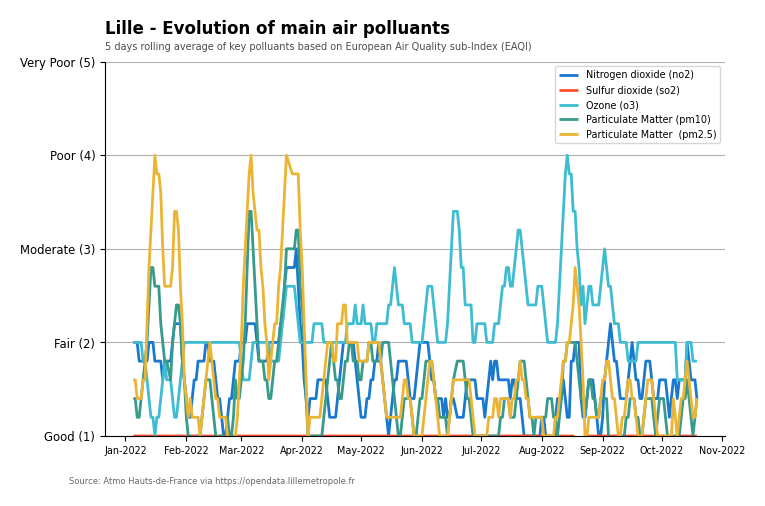

In [454]:
# Plot data
fig, ax = plt.subplots()
no2_lille = df.loc[('lille'), ('no2')].rolling(window=5).mean()
so2_lille = df.loc[('lille'), ('so2')].rolling(window=5).mean()
o3_lille = df.loc[('lille'), ('o3')].rolling(window=5).mean()
pm10_lille = df.loc[('lille'), ('pm10')].rolling(window=5).mean()
pm25_lille = df.loc[('lille'), ('pm2-5')].rolling(window=5).mean()
ax.plot(no2_lille)
ax.plot(so2_lille)
ax.plot(o3_lille)
ax.plot(pm10_lille)
ax.plot(pm25_lille)

# Titles, labels and axis display
ax.legend(['Nitrogen dioxide (no2)', 'Sulfur dioxide (so2)', 'Ozone (o3)', 'Particulate Matter (pm10)', 'Particulate Matter  (pm2.5)'])
ax.set_title("Lille - Evolution of main air polluants")
#ax.set_xlabel("Date")
ax.set_ylim(bottom=1, top=5)
ax.set_yticks(ticks=[1, 2, 3, 4, 5], labels=['Good (1)', 'Fair (2)', 'Moderate (3)', 'Poor (4)', 'Very Poor (5)'])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))

# Add in title and subtitle
ax.text(x=.125, y=.905, 
        s="5 days rolling average of key polluants based on European Air Quality sub-Index (EAQI)", 
        transform=fig.transFigure, 
        ha='left', 
        fontsize=7, 
        alpha=.7)

# Set source text
ax.text(x=.08, y=0, 
        s="Source: Atmo Hauts-de-France via https://opendata.lillemetropole.fr", 
        transform=fig.transFigure, 
        ha='left', 
        fontsize=6, 
        alpha=.6)


Exporting a graph as .png for each city

In [399]:
#for i in df['city']:
    #print(i)
index_list = list(df.index.values)

set_city = set()
for i in index_list:
    set_city.add(i[0])

In [440]:
for i in set_city:
    fig, ax = plt.subplots()
    ax.plot(df.loc[(i), ('no2')].rolling(window=5).mean())
    ax.plot(df.loc[(i), ('so2')].rolling(window=5).mean())
    ax.plot(df.loc[(i), ('o3')].rolling(window=5).mean())
    ax.plot(df.loc[(i), ('pm10')].rolling(window=5).mean())
    ax.plot(df.loc[(i), ('pm2-5')].rolling(window=5).mean())
    
    # Titles, labels and axis display
    ax.legend(['Nitrogen dioxide (no2)', 'Sulfur dioxide (so2)', 'Ozone (o3)', 'Particulate Matter (pm10)', 'Particulate Matter  (pm2.5)'])
    ax.set_title(str(city).capitalize() + " - Evolution of main air polluants")
    ax.set_xlabel("Date")
    ax.set_ylim(bottom=1, top=5)
    ax.set_yticks(ticks=[1, 2, 3, 4, 5], labels=['Good (1)', 'Fair (2)', 'Moderate (3)', 'Poor (4)', 'Very Poor (5)'])
    
    # Add in title and subtitle
    ax.text(x=.125, y=.905, 
            s="5 days rolling average of key polluants based on European Air Quality sub-Index (EAQI)", 
            transform=fig.transFigure, 
            ha='left', 
            fontsize=7, 
            alpha=.7)
    
    # Set source text
    ax.text(x=.08, y=0, 
            s="Source: Atmo Hauts-de-France via https://opendata.lillemetropole.fr", 
            transform=fig.transFigure, 
            ha='left', 
            fontsize=6, 
            alpha=.6)
    
    # Export plot as PNG
    timestr = time.strftime("%Y-%m-%d_%H-%M-%S")
    file_name = str(i) + '_sub_indexes-over-time_' + timestr + ".png"
    plt.savefig(data_out + file_name)
    print(f"file name: {file_name}")
    
    # Avoid display with close method
    plt.close(fig)
    

file name: linselles_sub_indexes-over-time2022-10-20_09-14-54.png
file name: allennes les marais_sub_indexes-over-time2022-10-20_09-14-55.png
file name: emmerin_sub_indexes-over-time2022-10-20_09-14-55.png
file name: madeleine_sub_indexes-over-time2022-10-20_09-14-56.png
file name: templemars_sub_indexes-over-time2022-10-20_09-14-57.png
file name: forest sur marque_sub_indexes-over-time2022-10-20_09-14-57.png
file name: roubaix_sub_indexes-over-time2022-10-20_09-14-58.png
file name: ronchin_sub_indexes-over-time2022-10-20_09-14-59.png
file name: wervicq sud_sub_indexes-over-time2022-10-20_09-14-59.png
file name: perenchies_sub_indexes-over-time2022-10-20_09-15-00.png
file name: quesnoy sur deule_sub_indexes-over-time2022-10-20_09-15-00.png
file name: fromelles_sub_indexes-over-time2022-10-20_09-15-01.png
file name: baisieux_sub_indexes-over-time2022-10-20_09-15-02.png
file name: villeneuve d ascq_sub_indexes-over-time2022-10-20_09-15-02.png
file name: deulemont_sub_indexes-over-time202

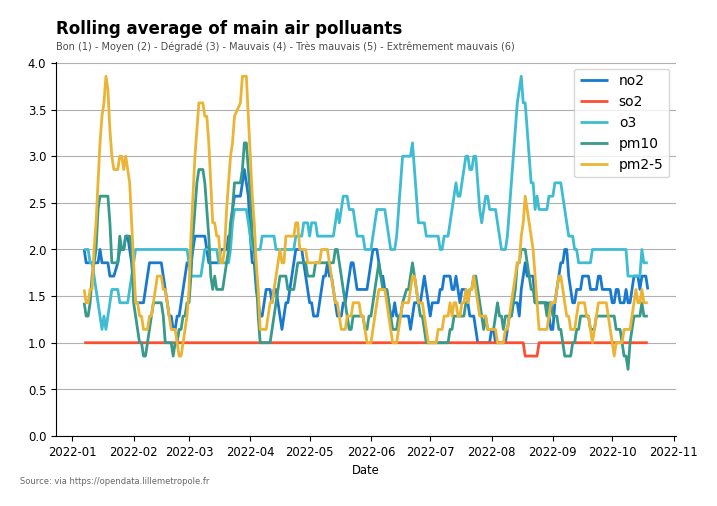

In [444]:
from cycler import cycler
import matplotlib as mpl


plt.style.use("default")

# find default figure with mpl.rcParams.keys()

# Colors 
mpl.rcParams['axes.prop_cycle'] = cycler(color=['#1879CE', '#FC4F30', '#3EBCD2', '#379A8B', '#EBB434', '#758D99']) #colors

# Style spines
mpl.rcParams['axes.linewidth'] = 0.8  # Spine edge line width
mpl.rcParams['axes.spines.top'] = False # Removing top spine
mpl.rcParams['axes.spines.left'] = True # default 
mpl.rcParams['axes.spines.right'] = False # Removing right spine
mpl.rcParams['axes.spines.bottom'] = True # default

# Set line styling for line plots
mpl.rcParams['lines.linewidth'] = 2 # line width
mpl.rcParams['lines.solid_capstyle'] = 'butt' # Makes a square ending of the line stopping at datapoint

# Grid style
mpl.rcParams['axes.grid'] = True # Adding grid
mpl.rcParams['axes.grid.axis'] = 'y' # default = 'both'
mpl.rcParams['grid.linewidth'] = 0.8
mpl.rcParams['grid.color'] = '#b0b0b0'
mpl.rcParams['axes.axisbelow'] = True # default = 'line'

# Set spacing for figure and also DPI.
mpl.rcParams['figure.subplot.left'] = 0.125
mpl.rcParams['figure.subplot.right'] = 0.90
mpl.rcParams['figure.subplot.bottom'] = 0.10
mpl.rcParams['figure.subplot.top'] = 0.88
mpl.rcParams['figure.figsize'] = 8, 4.8
mpl.rcParams['figure.dpi'] = 100

# Legend Styling
mpl.rcParams['legend.framealpha'] = 0.8

# Properties for saving the figure. Ensure a high DPI when saving so we have a good resolution.
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['savefig.facecolor'] = 'white'
mpl.rcParams['savefig.bbox'] = 'tight'
mpl.rcParams['savefig.pad_inches'] = 0.2

# Title styling
mpl.rcParams['axes.titlelocation'] = 'left'
mpl.rcParams['axes.titlepad'] = 20
mpl.rcParams['axes.titlesize'] = 12
mpl.rcParams['axes.titleweight'] = 'bold'

# Setting font sizes and spacing
mpl.rcParams['axes.labelsize'] = 'small'
mpl.rcParams['xtick.labelsize'] = 'small'
mpl.rcParams['ytick.labelsize'] = 'small'
mpl.rcParams['font.size'] = 10
mpl.rcParams['xtick.major.pad'] = 3.5
mpl.rcParams['ytick.major.pad'] = 3.5


fig, ax = plt.subplots()
no2_lille = df.loc[('lille'), ('no2')].rolling(window=7).mean()
so2_lille = df.loc[('lille'), ('so2')].rolling(window=7).mean()
o3_lille = df.loc[('lille'), ('o3')].rolling(window=7).mean()
pm10_lille = df.loc[('lille'), ('pm10')].rolling(window=7).mean()
pm25_lille = df.loc[('lille'), ('pm2-5')].rolling(window=7).mean()
ax.plot(no2_lille)
ax.plot(so2_lille)
ax.plot(o3_lille)
ax.plot(pm10_lille)
ax.plot(pm25_lille)


ax.legend(['no2', 'so2', 'o3', 'pm10', 'pm2-5'])
ax.set_title("Rolling average of main air polluants")
ax.set_xlabel("Date")
# ax.set_ylabel("Index")
ax.set_ylim(0)

#ax.set_ylim(0)

# Add in title and subtitle
ax.text(x=.125, y=.905, 
        s="Bon (1) - Moyen (2) - Dégradé (3) - Mauvais (4) - Très mauvais (5) - Extrêmement mauvais (6)", 
        transform=fig.transFigure, 
        ha='left', 
        fontsize=7, 
        alpha=.7)


# Set source text
ax.text(x=.08, y=0, 
        s="Source: via https://opendata.lillemetropole.fr", 
        transform=fig.transFigure, 
        ha='left', 
        fontsize=6, 
        alpha=.6)


# Export plot as high resolution PNG
plt.savefig('lille-polluant.png')

<AxesSubplot: xlabel='month'>

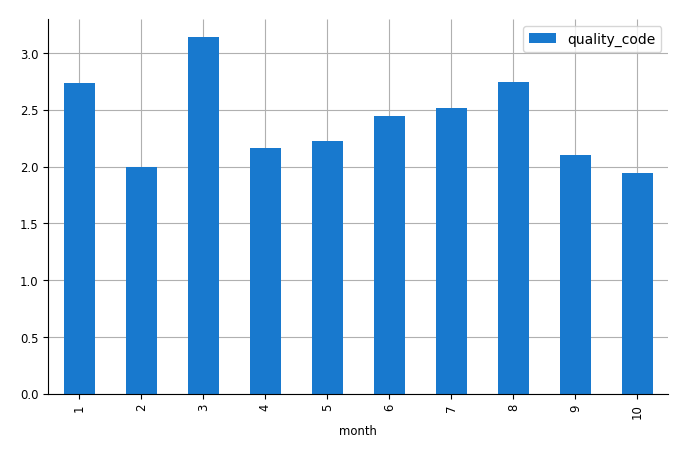

In [374]:
df.loc[('lille'), ['quality_code', 'month']].groupby('month').aggregate('mean').plot(kind='bar')

## BAC A SABLE

In [37]:
df[df['quality_code'] >= 5 ]

zip_code quality_label  quality_code  \
city                     date                                               
annoeullin               2022-03-29     59112  très mauvais             5   
aubers                   2022-01-14     59249  très mauvais             5   
                         2022-03-29     59249  très mauvais             5   
baisieux                 2022-01-14     59780  très mauvais             5   
bassee                   2022-03-29     59480  très mauvais             5   
bauvin                   2022-03-29     59221  très mauvais             5   
beaucamps ligny          2022-01-14     59134  très mauvais             5   
                         2022-03-29     59134  très mauvais             5   
bondues                  2022-01-14     59910  très mauvais             5   
                         2022-01-15     59910  très mauvais             5   
chereng                  2022-01-14     59152  très mauvais             5   
comines                  2022-01-14     59560  très mauvais             5   
croix                    2022-01-14     59170  très mauvais             5   
don                      2022-03-29     59272  très mauvais             5   
erquinghem le sec        2022-01-14     59320  très mauvais             5   
                         2022-03-29     59320  très mauvais             5   
fournes en weppes        2022-03-29     59134  très mauvais             5   
fromelles                2022-01-14     59249  très mauvais             5   
                         2022-03-29     59249  très mauvais             5   
hallennes lez haubourdin 2022-01-14     59320  très mauvais             5   
hantay                   2022-01-14     59480  très mauvais             5   
                         2022-03-29     59480  très mauvais             5   
haubourdin               2022-01-14     59320  très mauvais             5   
hem                      2022-01-14     59510  très mauvais             5   
herlies                  2022-03-29     59134  très mauvais             5   
illies                   2022-01-14     59480  très mauvais             5   
                         2022-03-29     59480  très mauvais             5   
loos                     2022-01-14     59120  très mauvais             5   
maisnil                  2022-03-29     59134  très mauvais             5   
marquillies              2022-01-14     59274  très mauvais             5   
                         2022-03-29     59274  très mauvais             5   
provin                   2022-03-29     59185  très mauvais             5   
radinghem en weppes      2022-03-29     59320  très mauvais             5   
roubaix                  2022-01-15     59100  très mauvais             5   
sainghin en weppes       2022-03-29     59184  très mauvais             5   
salome                   2022-01-14     59496  très mauvais             5   
                         2022-03-29     59496  très mauvais             5   
santes                   2022-01-14     59211  très mauvais             5   
seclin                   2022-01-14     59113  très mauvais             5   
sequedin                 2022-01-14     59320  très mauvais             5   
villeneuve d ascq        2022-01-14     59650  très mauvais             5   
wambrechies              2022-01-14     59118  très mauvais             5   
                         2022-01-15     59118  très mauvais             5   
wavrin                   2022-01-14     59136  très mauvais             5   
                         2022-03-29     59136  très mauvais             5   
wicres                   2022-03-29     59134  très mauvais             5   

                                     no2  so2  o3  pm10  pm2-5  year  month  \
city                     date                                                 
annoeullin               2022-03-29    2    1   1     4      5  2022      3   
aubers                   2022-01-14    2    1   1     4      5  2022      1   
                        

In [39]:
df.groupby(by='weekday').aggregate('mean')

,zip_code,quality_code,no2,so2,o3,pm10,pm2-5,year,month,day,week_of_year
weekday,,,,,,,,,,,
0,59341.726316,2.361654,1.418797,1.00000,2.151378,1.307519,1.583709,2022.0,5.333333,15.571429,21.5
1,59341.726316,2.482206,1.349875,1.00000,2.124812,1.505263,1.740100,2022.0,5.380952,15.166667,21.5
2,59341.726316,2.598460,1.316816,1.00000,2.197176,1.500899,1.736329,2022.0,5.292683,15.341463,21.0
3,59341.726316,2.512709,1.289859,0.97561,2.313736,1.405135,1.675738,2022.0,5.317073,15.585366,21.0
4,59341.726316,2.313158,1.372368,1.00000,2.180526,1.471842,1.487632,2022.0,5.425000,14.850000,21.225
5,59341.726316,2.257105,1.243158,1.00000,2.094211,1.303684,1.410000,2022.0,5.325000,14.675000,21.925
6,59341.726316,2.289345,1.181001,1.00000,2.102439,1.214121,1.501926,2022.0,5.414634,15.121951,22.195122


In [40]:
df.groupby(by=['weekday', 'week_of_year']).aggregate({'quality_code': 'mean'})

quality_code
weekday week_of_year              
0       1                 2.000000
        2                 2.000000
        3                 3.000000
        4                 3.378947
        5                 2.000000
...                            ...
6       38                2.000000
        39                2.000000
        40                1.000000
        41                2.000000
        52                2.000000

[287 rows x 1 columns]

In [75]:
#The day of the week with Monday=0, Sunday=6.
df.groupby(by=['month', 'weekday']).aggregate({'quality_code': 'mean'})

quality_code
month weekday              
1     0            2.475789
      1            3.044737
      2            3.123684
      3            2.476316
      4            2.560526
      5            2.463158
      6            2.147368
2     0            2.005263
      1            2.000000
      2            2.015789
      3            2.000000
      4            2.000000
      5            2.000000
      6            2.000000
3     0            2.942105
      1            3.244211
      2            3.425263
      3            3.094737
      4            2.666667
      5            2.666667
      6            3.186842
4     0            2.105263
      1            2.281579
      2            2.055263
      3            2.573684
      4            2.002105
      5            2.000000
      6            2.339474
5     0            2.400000
      1            2.200000
      2            2.250000
      3            2.021053
      4            2.018421
      5            2.250000
      6            2.431579
6     0            2.000000
      1            2.250000
      2            2.941053
      3            2.610526
      4            2.842105
      5            2.435088
      6            2.000000
7     0            2.000000
      1            2.000000
      2            2.000000
      3            2.000000
      4            2.139130
      5            2.000000
      6            2.000000

In [43]:
#best and worst cities (low is good)
df.groupby('city').quality_code.mean().sort_values()

city
herlies              2.376307
wicres               2.376307
fournes en weppes    2.383275
bassee               2.383275
maisnil              2.383275
                       ...   
tourcoing            2.439024
halluin              2.442509
roubaix              2.442509
villeneuve d ascq    2.445993
wattrelos            2.452962
Name: quality_code, Length: 95, dtype: float64

<AxesSubplot: xlabel='month'>

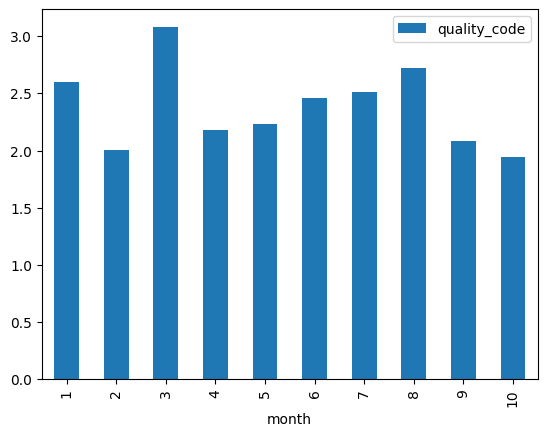

In [59]:
df.loc[(slice(None)), ['quality_code', 'month']].groupby('month').aggregate('mean').plot(kind='bar')


<AxesSubplot: xlabel='week_of_year'>

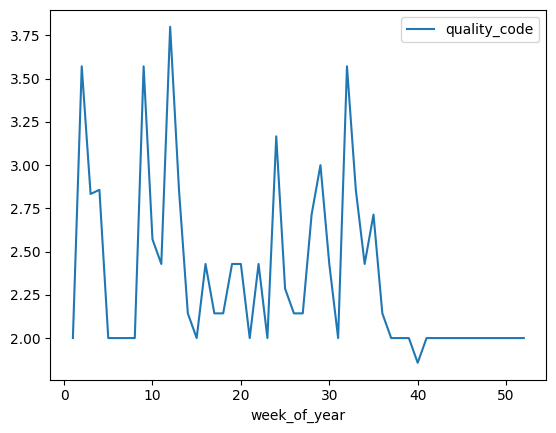

In [62]:
df.loc[('lille'), ['quality_code', 'week_of_year']].groupby('week_of_year').aggregate('mean').plot(kind='line')